In [1]:
dataset=[
    ['아메리카노', '카페라떼'], ['카페라떼', '아메리카노', '카푸치노'],
    ['바닐라라떼', '아메리카노'], ['녹차라떼', '카페라떼', '아메리카노'],
    ['카페모카', '아메리카노'], ['아메리카노', '카페라떼'],
    ['초콜릿', '아메리카노'], ['아메리카노'],
    ['카페모카', '카페라떼']
]    

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 트랜잭션 자료형으로 변환
# x축: 전체 품목, y축: 거래 아이디(한장의 영수증)
te = TransactionEncoder()
te_result = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_result, columns = te.columns_)   # 데이터프레임 변환
df.head(3)

,녹차라떼,바닐라라떼,아메리카노,초콜릿,카페라떼,카페모카,카푸치노
0,False,False,True,False,True,False,False
1,False,False,True,False,True,False,True
2,False,True,True,False,False,False,False


In [8]:
# 선험적 알고리즘 support > 0.1
from mlxtend.frequent_patterns import apriori

itemsets = apriori(df, min_support=0.1, use_colnames = True)
itemsets   #아메리카노를 살 확률 0.88, 카페라떼를 살 확률 0.55

,support,itemsets
0,0.111111,(녹차라떼)
1,0.111111,(바닐라라떼)
2,0.888889,(아메리카노)
3,0.111111,(초콜릿)
4,0.555556,(카페라떼)
5,0.222222,(카페모카)
6,0.111111,(카푸치노)
7,0.111111,"(아메리카노, 녹차라떼)"
8,0.111111,"(녹차라떼, 카페라떼)"
9,0.111111,"(바닐라라떼, 아메리카노)"


In [9]:
# confidence > 0.3 (기본값 0.8)
from mlxtend.frequent_patterns import association_rules
rules=association_rules(itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(녹차라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
1,(녹차라떼),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf,0.500
2,(바닐라라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
3,(초콜릿),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
4,(카페라떼),(아메리카노),0.555556,0.888889,0.444444,0.8,0.900,-0.049383,0.555556,-0.200
5,(카푸치노),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
6,(카푸치노),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf,0.500
7,"(아메리카노, 녹차라떼)",(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf,0.500
8,"(녹차라떼, 카페라떼)",(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
9,(녹차라떼),"(아메리카노, 카페라떼)",0.111111,0.444444,0.111111,1.0,2.250,0.061728,inf,0.625


In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

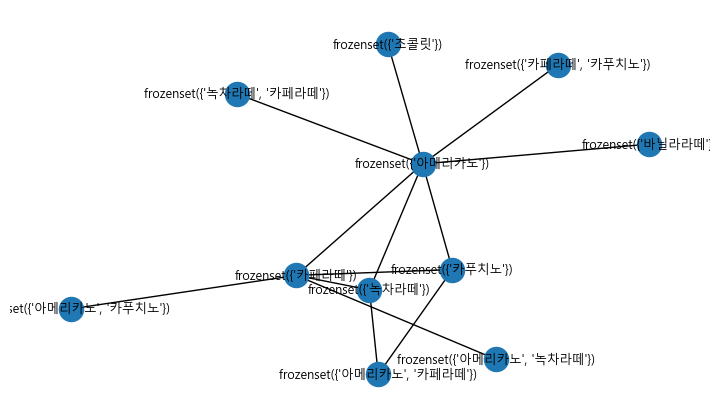

In [11]:
# 선행 antecedentes ~라면 / 결과~이다 consequents
import networkx as nx
ga = nx.from_pandas_edgelist(rules, source='antecedents', target = 'consequents')
plt.figure(figsize = (7,4))
nx.draw(ga, with_labels = True, font_family = font_name, font_size = 9)
# source: 그래프의 안쪽 노드, target: 그래프의 바깥쪽 노드
